      V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V30    V31    V32    V33    V34    V35    V36    V37  target  oringin  
0  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175    train  
1  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676    train  
2  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633    train  
3  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206    train  
4  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384    train  

[5 rows x 40 columns]


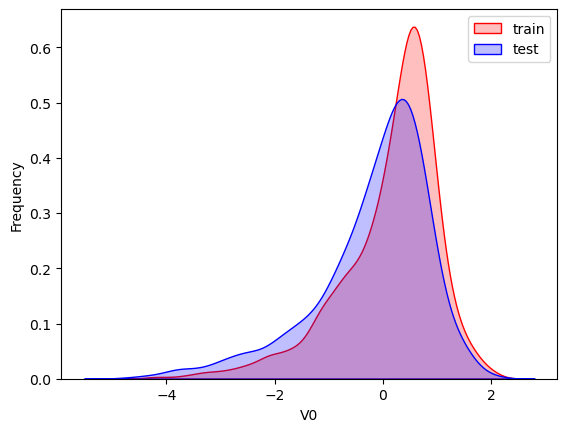

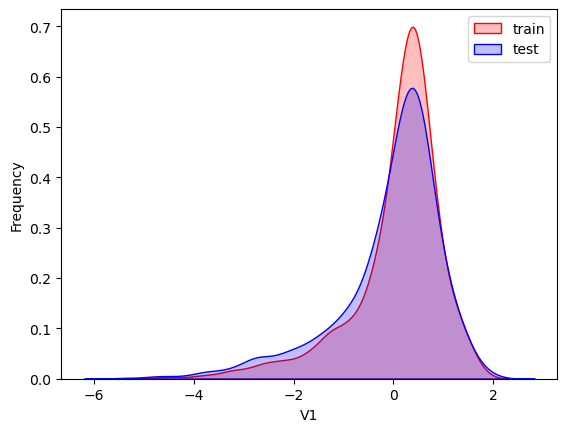

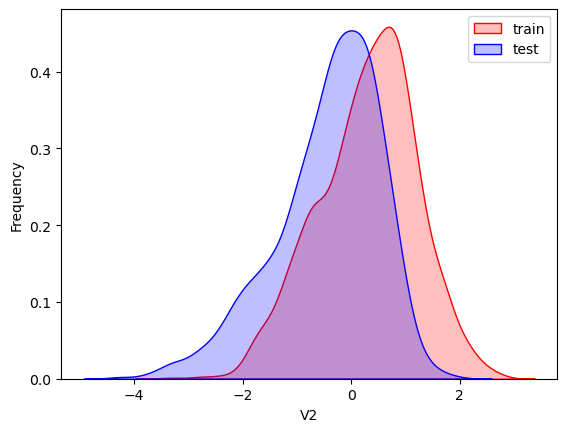

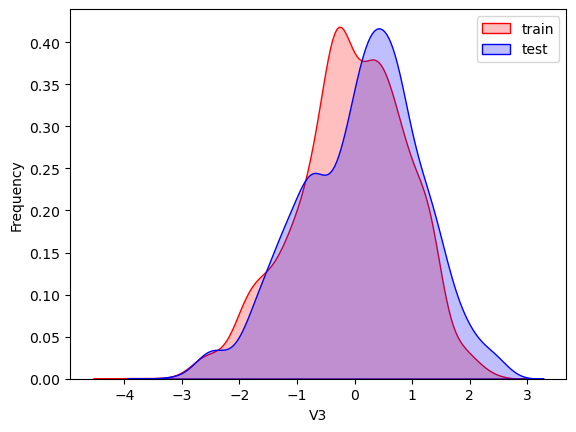

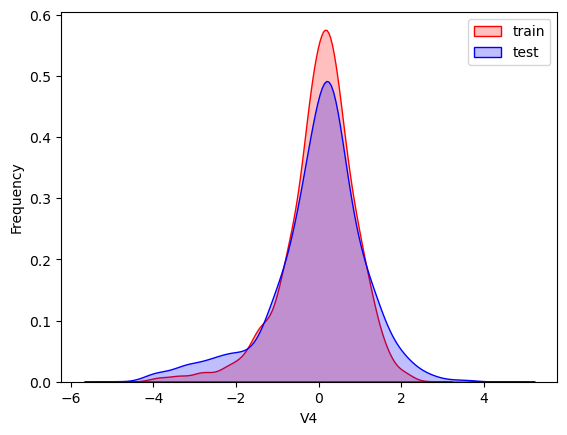

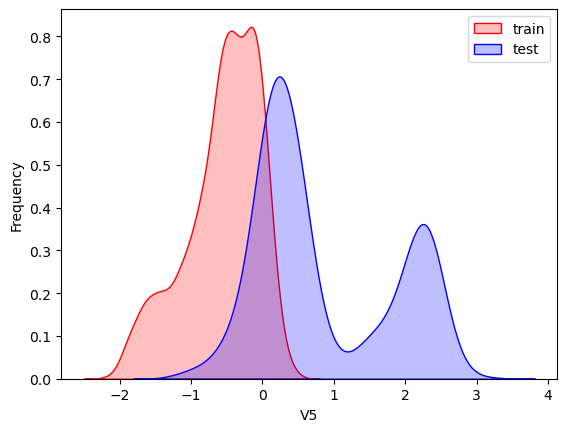

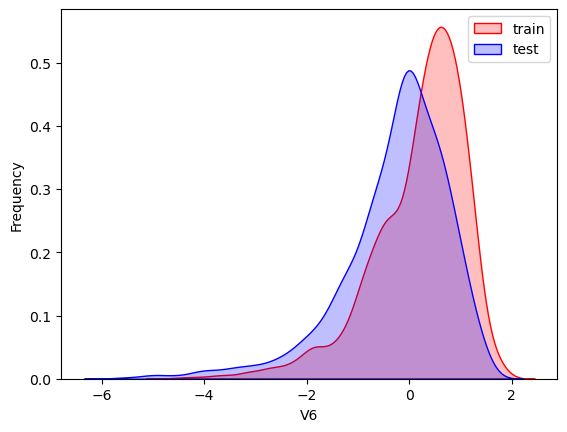

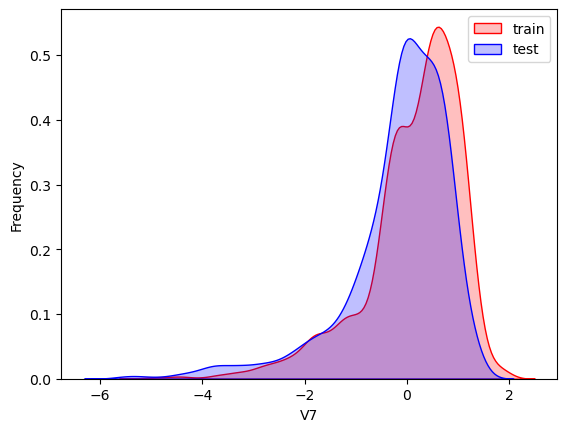

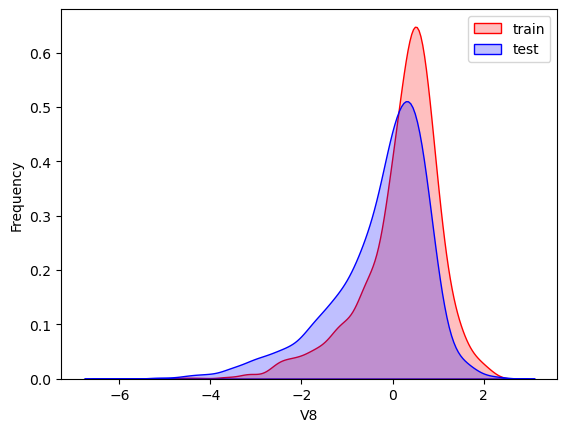

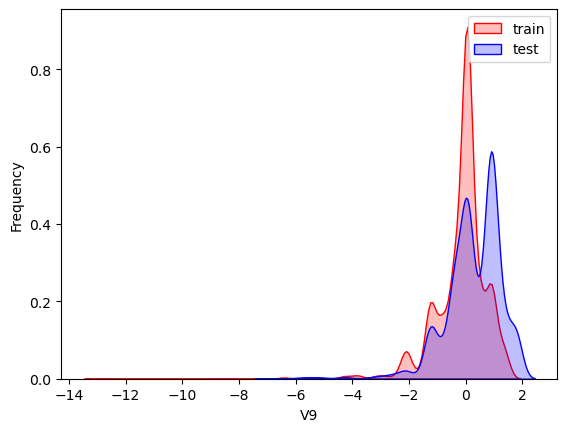

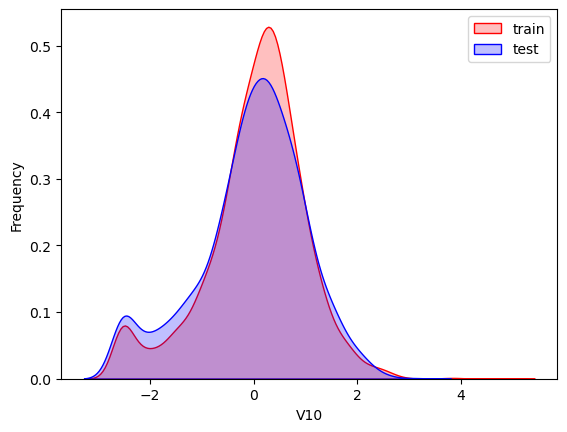

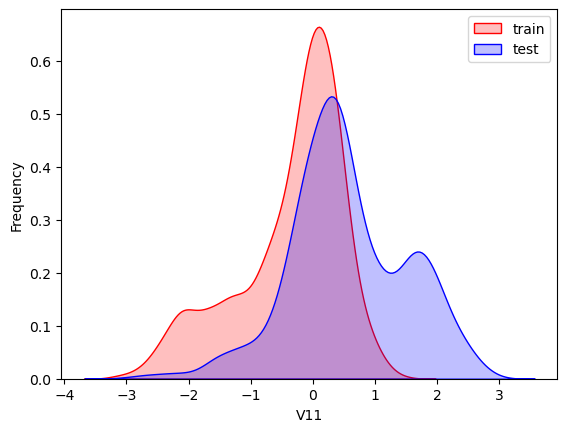

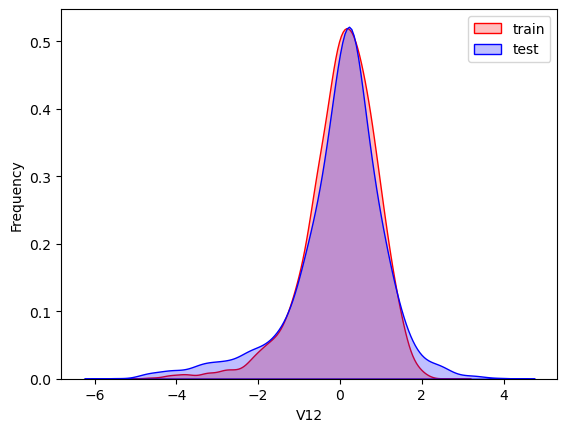

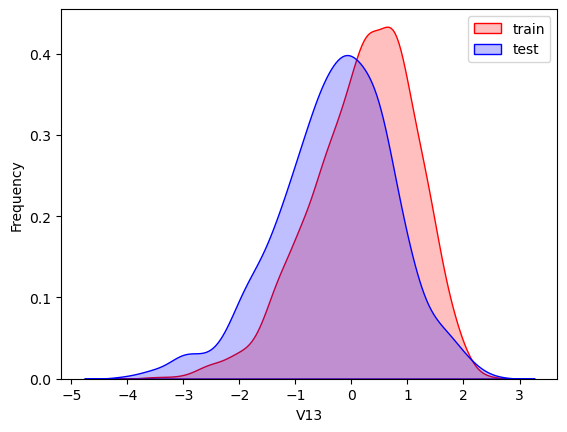

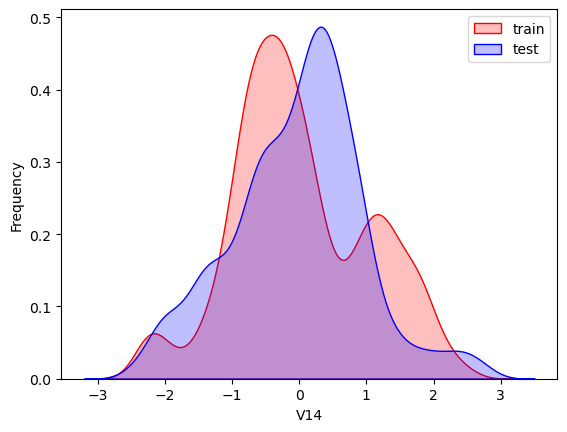

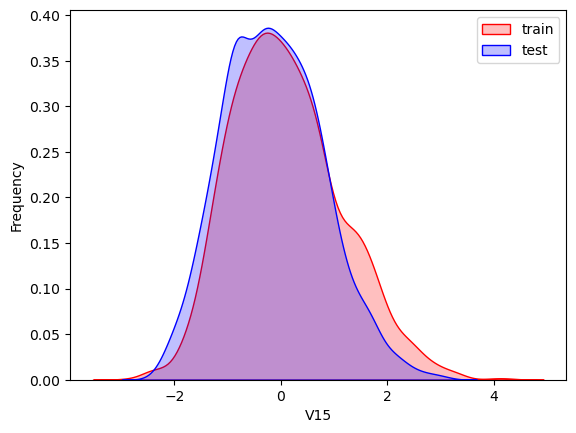

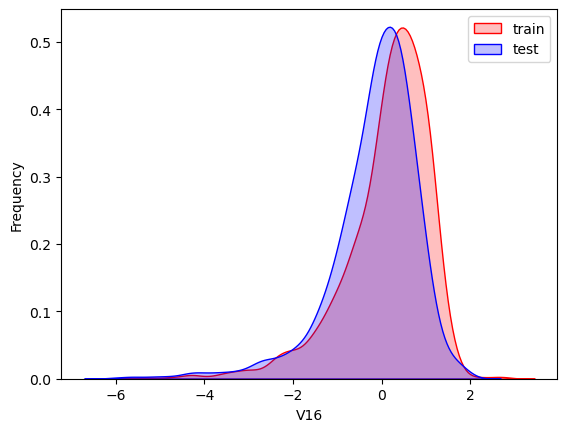

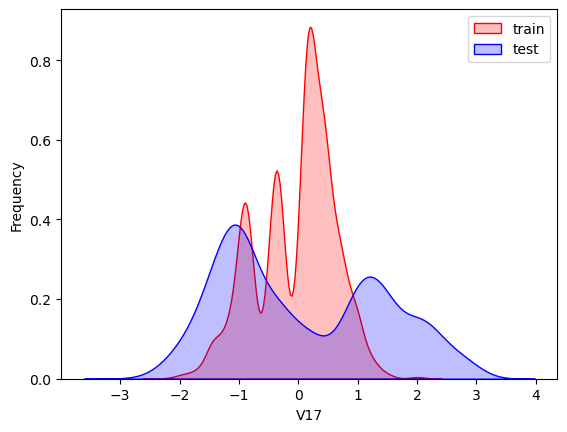

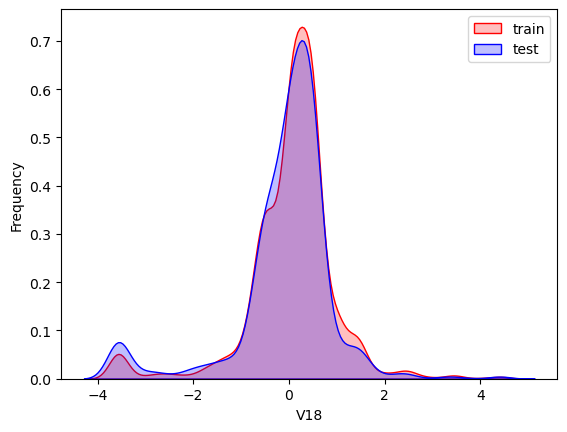

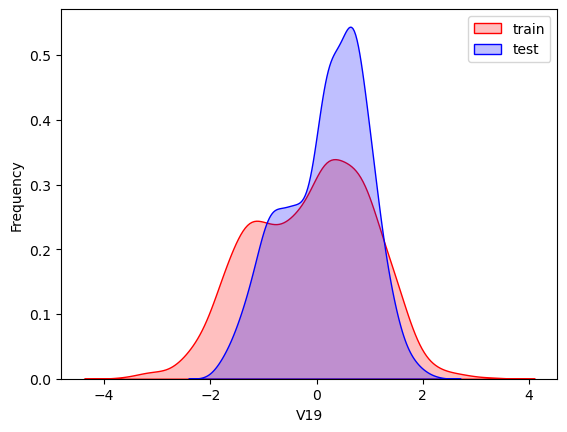

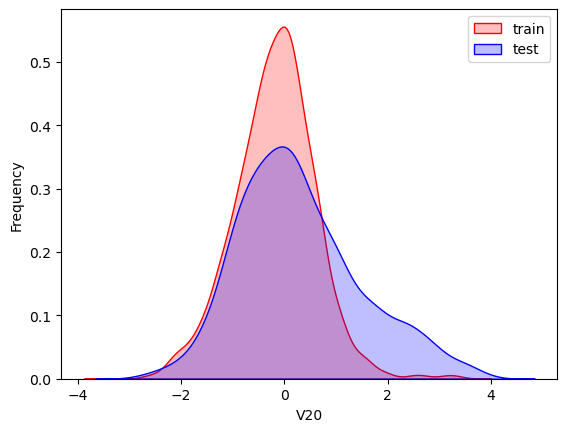

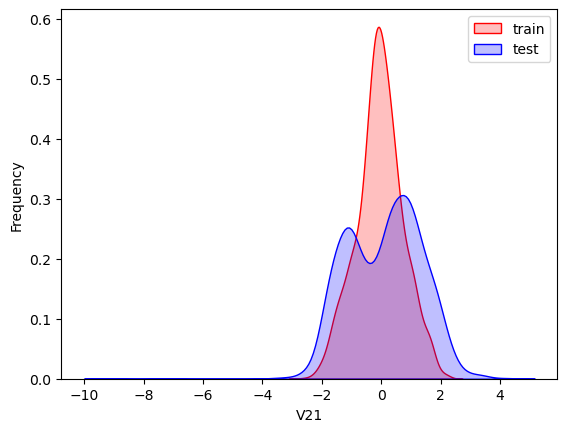

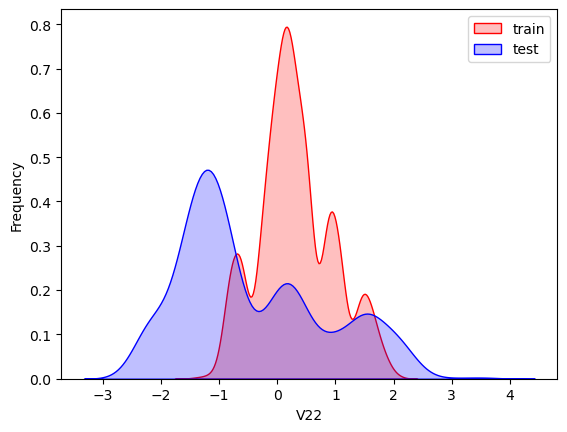

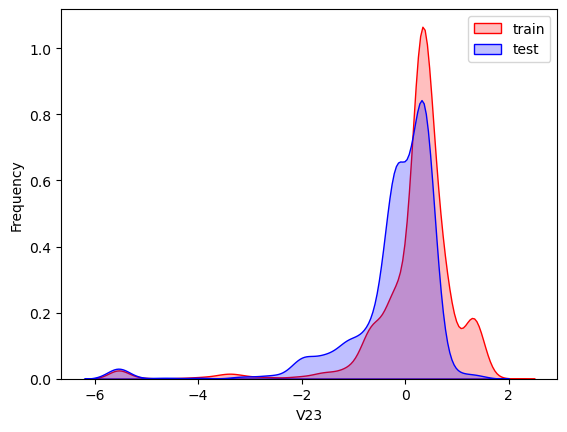

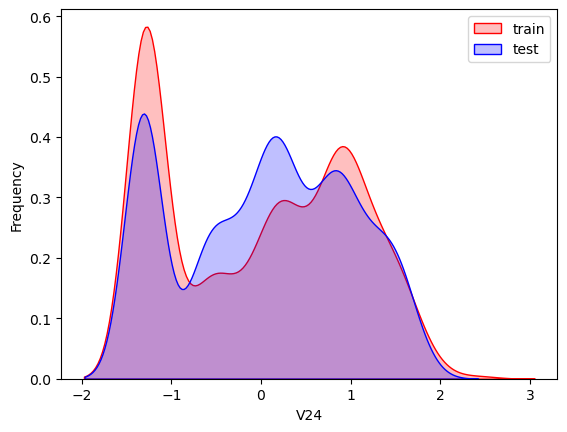

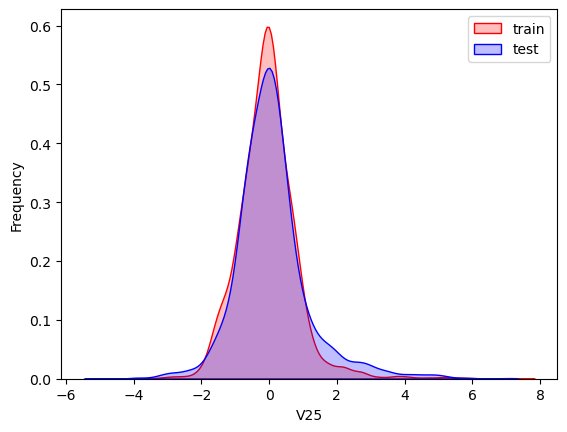

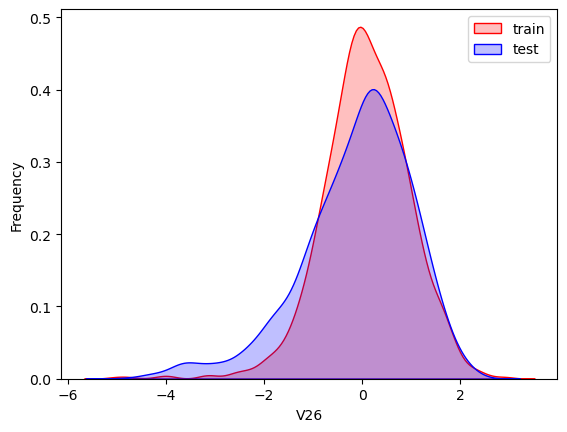

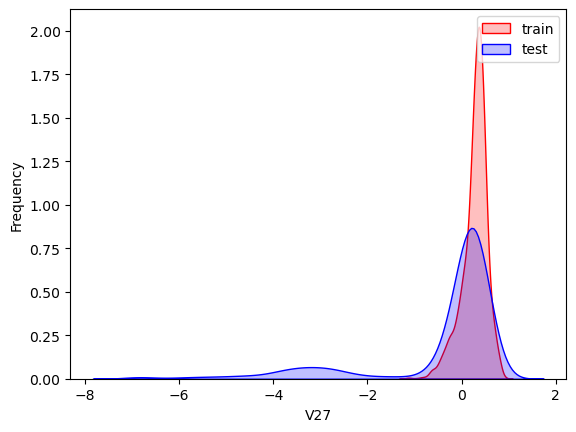

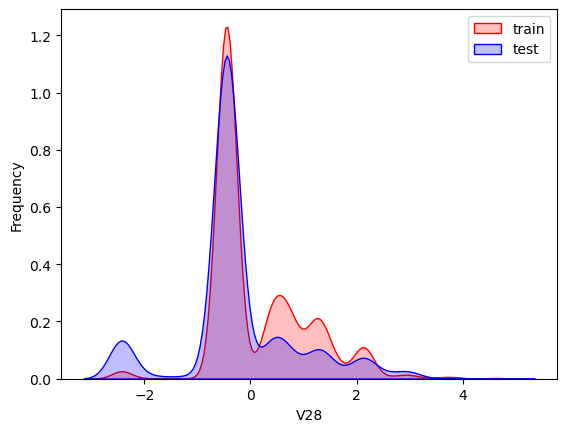

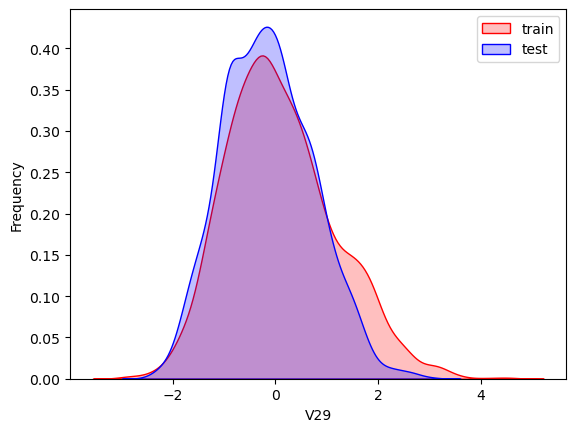

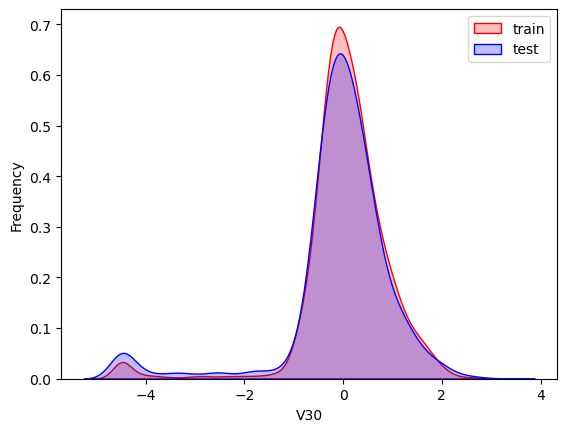

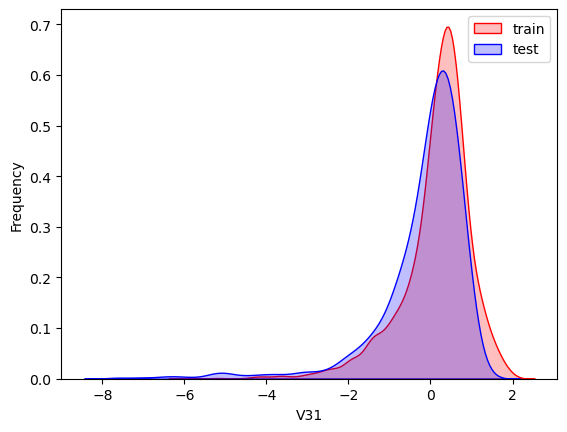

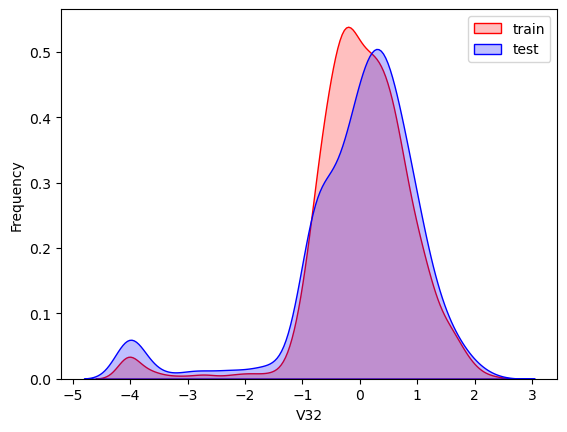

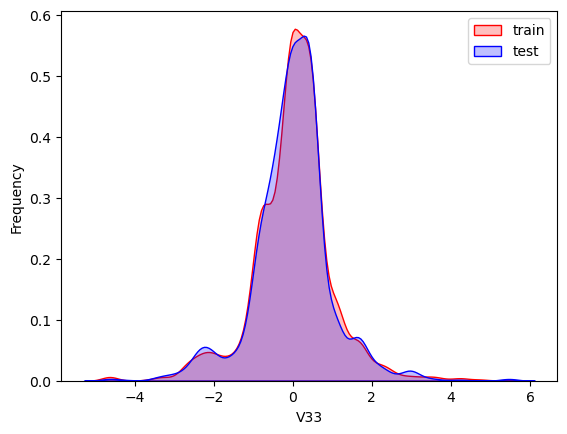

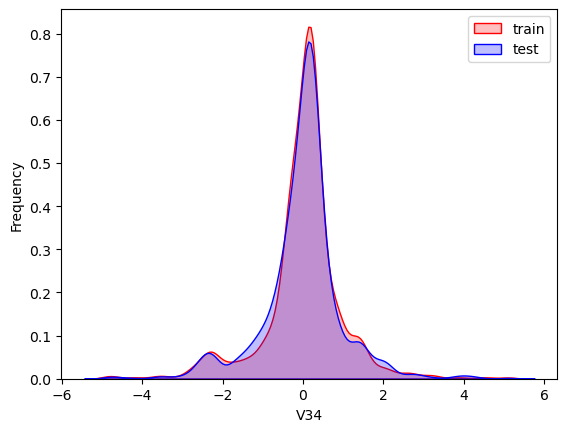

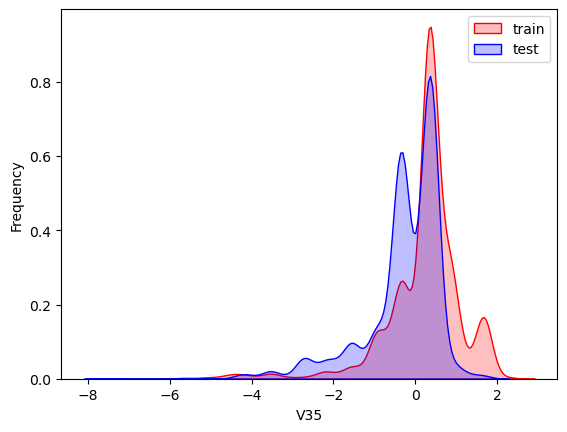

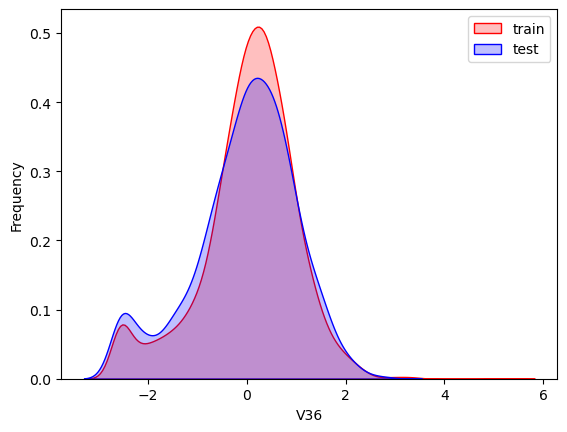

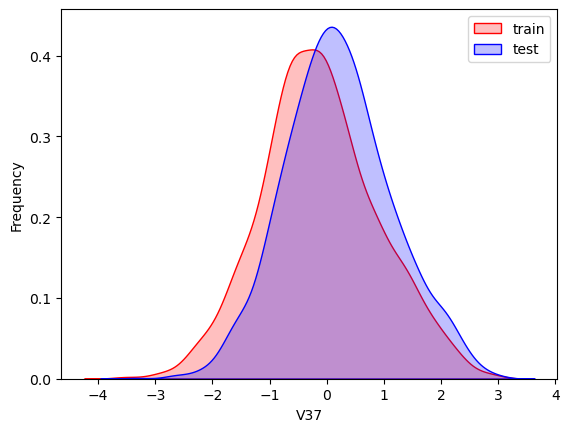

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

# modelling
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler

#load_dataset
with open("C:\D\Coding\Projects\steam_pre\zhengqi_train.txt")  as fr:
    data_train=pd.read_table(fr,sep="\t")
with open("C:\D\Coding\Projects\steam_pre\zhengqi_test.txt") as fr_test:
    data_test=pd.read_table(fr_test,sep="\t")

#merge train_set and test_set
data_train["oringin"]="train"
data_test["oringin"]="test"
data_all=pd.concat([data_train,data_test],axis=0,ignore_index=True)
#View data
print(data_all.head())

# Explore feature distibution 
#fig = plt.figure(figsize=(6, 6))
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()